# **Exploratory Data Analysis**

**Important Libraries**

In [268]:
import numpy as np
import matplotlib as plt
import pandas as pd
import sklearn as skl
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Import Data Set and Display Data**

In [269]:
#import the data and inspect to see the shape and the magnitude/type of varibales

heart_data=pd.read_csv('/content/drive/MyDrive/NYU Data Science Bootcamp/heart.csv')
df=heart_data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Compute Basic Statistics of the Dataset**

In [270]:
#find the general statistics of the dataset to get an idea of any correlations in the data

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Check the data type of each column**

In [271]:
#check the data type of each column

print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


**Display Dataset Information**

In [272]:
#check to see if all the columns have the same amound of non-null values to decide whether or not we want to clean data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Check the Size of the Data**

In [273]:
#numerical depiction of the shape of the data

df.shape

(303, 14)

**Check the names of the columns**

In [274]:
#check the column names

df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**Check for missing data**

In [275]:
#confirm that there is no null data

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Visualize Data to check for Correlations**

In [276]:
#sns.pairplot(df)

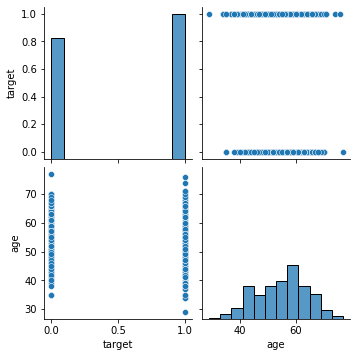

In [277]:
sns.pairplot(df, vars=("target","age"))

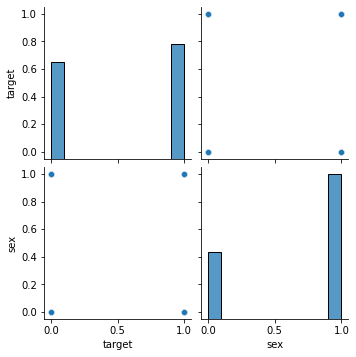

In [278]:
sns.pairplot(df, vars=("target","sex"))

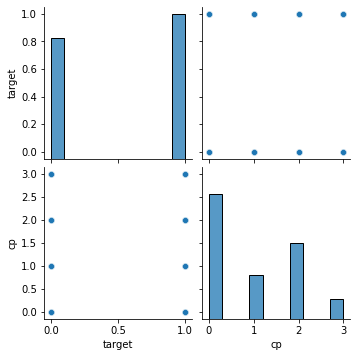

In [279]:
sns.pairplot(df, vars=("target","cp"))

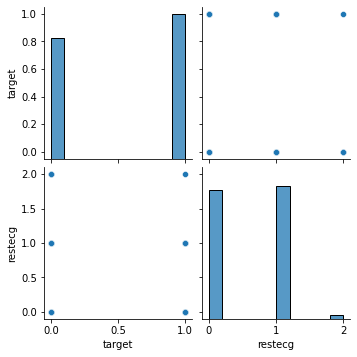

In [280]:
sns.pairplot(df, vars=("target","restecg"))

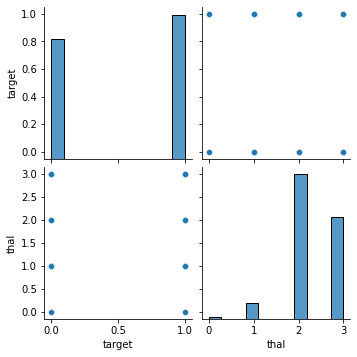

In [281]:
sns.pairplot(df, vars=("target","thal"))

# **Data Preprocessing**

**Convert to Numpy Array for easy manipulation**

In [282]:
arr=df.to_numpy()

**Splitting the dataset in the depended and independent variables**

In [283]:
#split the dataset by having the independed variables i.e. the first 13 columns in one array and the dependent variable in another array

X= arr[:,0:-1]
y= arr[:,-1]
print(X)
print(y)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0

**Splitting the dataset into test sets and train sets**

In [284]:
#split the dataset into a test set and a training set for both arrays created in the step above to avoid influence of the training set on the test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Feature Scaling**

In [285]:
#feature scale the data so that we have better accuracy. Necessary since some values are of magnitude 10**2 while others are single digits

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-1.32773282 -1.43641607  0.98584243 ... -0.66169316 -0.70710678
  -0.46472917]
 [ 1.24903178 -1.43641607  0.98584243 ... -0.66169316  0.26516504
  -0.46472917]
 [ 0.35276583  0.69617712  0.98584243 ...  0.95577901 -0.70710678
  -0.46472917]
 ...
 [ 0.12869935  0.69617712  1.94013791 ... -0.66169316 -0.70710678
   1.14190596]
 [-0.87959984  0.69617712  0.98584243 ...  0.95577901 -0.70710678
  -0.46472917]
 [ 0.35276583  0.69617712  0.03154696 ... -0.66169316 -0.70710678
  -0.46472917]]
[[ 1.69716475  0.69617712 -0.92274852  0.77251645 -1.36354075 -0.41803981
   0.90163913 -1.07375268  1.40984195  1.2900049  -2.27916533 -0.70710678
   1.14190596]
 [ 1.02496529  0.69617712  1.94013791  2.23625729 -0.3703119  -0.41803981
  -0.97936664  0.22375805 -0.70929937 -0.38883987 -0.66169316 -0.70710678
   1.14190596]
 [ 0.46479907  0.69617712  1.94013791  2.23625729  0.7728383  -0.41803981
  -0.97936664  0.39675948 -0.70929937 -0.72460883 -0.66169316 -0.70710678
   1.14190596]
 [ 0.57683232  0.69

# **Data Analysis Using ANN**

**Initialize ANN**

In [286]:
ann = tf.keras.models.Sequential()

**Adding the first input layer**

In [287]:
ann.add(tf.keras.layers.Dense(units=13, activation='relu'))

**Adding the second hidden layer**

In [288]:
#ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

**Adding the output layer**

In [289]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**Compliling the ANN**

In [290]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Train the dataset from the train set**

In [291]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 0.9134 - accuracy: 0.3182
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8708 - accuracy: 0.3347
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.8304 - accuracy: 0.3636
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7955 - accuracy: 0.4174
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7625 - accuracy: 0.4421
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7303 - accuracy: 0.4835
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7024 - accuracy: 0.5331
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6760 - accuracy: 0.5992
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6505 - accuracy: 0.6281
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6282 - accuracy: 0.6983
Epoch 11/100
8/8 [===========

# **Predicting Results from Trained Data**

**Predicting the outcome based on the training set**

In [292]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0. 0.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


**Calculating the confusion matrix**

In [293]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[21  6]
 [ 3 31]]


0.8524590163934426